In [1]:
import pandas as pd
#import pandas_profiling

import matplotlib.pyplot as plt

In [2]:
import wandb

In [3]:
from datetime import datetime

datetime.now()

datetime.datetime(2025, 2, 28, 16, 0, 32, 962618)

In [4]:
run = wandb.init(project='nyc_airbnb', group='eda', save_code=True)
local_path = wandb.use_artifact('sample.csv:latest').file()


wandb: Currently logged in as: heschmat. Use `wandb login --relogin` to force relogin


In [5]:
df = pd.read_csv(local_path)

In [6]:
df.shape

(20000, 16)

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9138664,Private Lg Room 15 min to Manhattan,47594947,Iris,Queens,Sunnyside,40.74271,-73.92493,Private room,74,2,6,2019-05-26,0.13,1,5
1,31444015,TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...,8523790,Johlex,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaN,NaN,1,188
2,8741020,Voted #1 Location Quintessential 1BR W Village...,45854238,John,Manhattan,West Village,40.73631,-74.00611,Entire home/apt,245,3,51,2018-09-19,1.12,1,0
3,34602077,Spacious 1 bedroom apartment 15min from Manhattan,261055465,Regan,Queens,Astoria,40.76424,-73.92351,Entire home/apt,125,3,1,2019-05-24,0.65,1,13
4,23203149,Big beautiful bedroom in huge Bushwick apartment,143460,Megan,Brooklyn,Bushwick,40.69839,-73.92044,Private room,65,2,8,2019-06-23,0.52,2,8


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20000 non-null  int64  
 1   name                            19993 non-null  object 
 2   host_id                         20000 non-null  int64  
 3   host_name                       19992 non-null  object 
 4   neighbourhood_group             20000 non-null  object 
 5   neighbourhood                   20000 non-null  object 
 6   latitude                        20000 non-null  float64
 7   longitude                       20000 non-null  float64
 8   room_type                       20000 non-null  object 
 9   price                           20000 non-null  int64  
 10  minimum_nights                  20000 non-null  int64  
 11  number_of_reviews               20000 non-null  int64  
 12  last_review                     

In [9]:
df.isnull().sum()

id                                   0
name                                 7
host_id                              0
host_name                            8
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4123
reviews_per_month                 4123
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<Axes: >

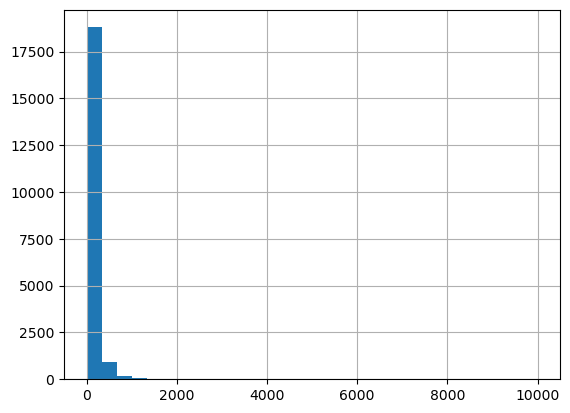

In [10]:
df['price'].hist(bins=30)

In [11]:
df['price'].describe()

count    20000.000000
mean       153.269050
std        243.325609
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<Axes: >

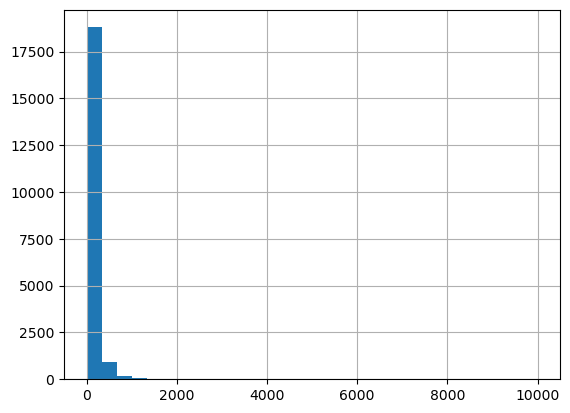

In [12]:
df['price'].hist(bins=30)

In [13]:
min_price, max_price = 10, 350

idx = df['price'].between(min_price, max_price)
df = df[idx]

In [14]:
# convert `last_review` to datetime
df['last_review'] = pd.to_datetime(df['last_review'])


In [15]:
# Confirm the modification
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [16]:
run.finish()

In [17]:
# save the notebook, then close it via **File > Close & Halt**

# In the main page, click Quit to stop Jupyter. This will terminate `mlflow run`

In [18]:
print('Done!')

Done!
